<a href="https://colab.research.google.com/github/niikun/introduction_LLM/blob/main/Logistic_regression_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Logistic Regression in PyTorch

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

In [2]:
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15781067.39it/s]


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 547429.26it/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4430667.80it/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5901650.80it/s]


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



In [3]:
print("Number of MNIST training examples: {}".format(len(mnist_train)))
print("Number of MNIST test examples: {}".format(len(mnist_test)))

Number of MNIST training examples: 60000
Number of MNIST test examples: 10000


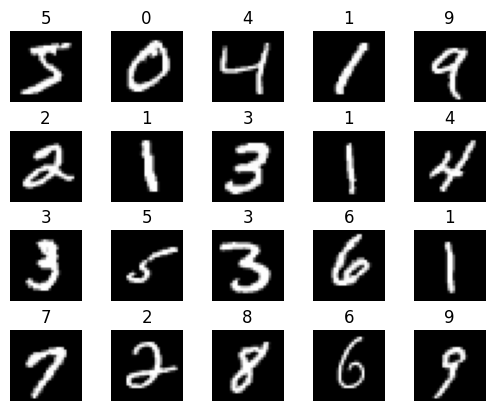

In [4]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(mnist_train[i][0].view(28,28).numpy(),cmap="gray")
    plt.title(mnist_train[i][1])
    plt.axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.show()

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [6]:
data_train_iter = iter(train_loader)
images, labels = next(data_train_iter)

print("Shape of the minibatch of images: {}".format(images.shape))
print("Shape of the minibatch of labels: {}".format(labels.shape))

Shape of the minibatch of images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of labels: torch.Size([100])


In [7]:
X = images.view(-1,28*28)
print("Shape of the flattened minibatch of images: {}".format(X.shape))

Shape of the flattened minibatch of images: torch.Size([100, 784])


In [8]:
W = torch.randn(784,10)/np.sqrt(784)
W.requires_grad_()

b = torch.zeros(10,requires_grad=True)

In [9]:
W.shape,b.shape

(torch.Size([784, 10]), torch.Size([10]))

In [10]:
y = torch.matmul(X,W)+b
y

tensor([[ 0.0118, -0.3032, -0.4778,  0.1470, -0.3362, -0.4827, -0.3633,  0.3613,
         -0.2652,  0.1079],
        [ 0.2945, -0.0987,  0.1016, -0.1387, -0.0555, -0.3897, -0.0509,  0.3451,
          0.3117,  0.2234],
        [ 0.1111,  0.0860, -0.0144,  0.1385, -0.3551,  0.1320, -0.4102,  0.2758,
          0.2994, -0.2487],
        [ 0.1252,  0.2251, -0.2453, -0.4163, -0.3675, -0.5122, -0.2326,  0.4005,
          0.2935,  0.1124],
        [-0.1834, -0.1673, -0.6237, -0.0847, -0.4925, -0.5204, -0.6781,  0.5554,
         -0.0276, -0.0714],
        [ 0.2713,  0.2511, -0.7535,  0.2595, -0.0698, -0.5532, -0.3505,  0.1523,
          0.4038, -0.1395],
        [ 0.1094, -0.0697, -0.5558,  0.1657,  0.0135,  0.0661,  0.0406,  0.1331,
          0.1158, -0.0788],
        [ 0.1808, -0.2274,  0.0166, -0.0847, -0.3555, -0.1056,  0.0065,  0.1718,
          0.3657,  0.4077],
        [-0.1496, -0.1332, -0.2893,  0.3738, -0.2928, -0.2444, -0.3011,  0.0744,
         -0.1752,  0.0246],
        [-0.1333, -

In [11]:
py_eq = torch.exp(y)/torch.exp(y).sum(dim=1,keepdim=True)
py_eq[0,:]

tensor([0.1141, 0.0832, 0.0699, 0.1306, 0.0805, 0.0696, 0.0784, 0.1618, 0.0865,
        0.1256], grad_fn=<SliceBackward0>)

In [12]:
import torch.nn.functional as F
py = F.softmax(y,dim=1)
py[0,:]

tensor([0.1141, 0.0832, 0.0699, 0.1306, 0.0805, 0.0696, 0.0784, 0.1618, 0.0865,
        0.1256], grad_fn=<SliceBackward0>)

In [13]:
print(labels.shape)

torch.Size([100])


In [14]:
cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
cross_entropy_eq

tensor(2.2207, grad_fn=<MeanBackward0>)

In [15]:
cross_entropy = F.cross_entropy(y,labels)
cross_entropy

tensor(2.2207, grad_fn=<NllLossBackward0>)

In [16]:
optimizer = torch.optim.SGD([W,b],lr=0.1)

In [17]:
cross_entropy.backward()

In [18]:
W.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [19]:
b.grad

tensor([ 1.9386e-02, -6.7495e-04,  2.6825e-02,  2.1197e-02, -2.0948e-02,
        -3.3682e-02, -8.8107e-05, -1.8457e-03, -3.3487e-02,  2.3317e-02])

In [20]:
optimizer.step()

In [21]:
W.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [23]:
# Iterate through train set minibatchs
for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()

    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)
    # Backward pass
    cross_entropy.backward()
    optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

In [24]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9023000001907349


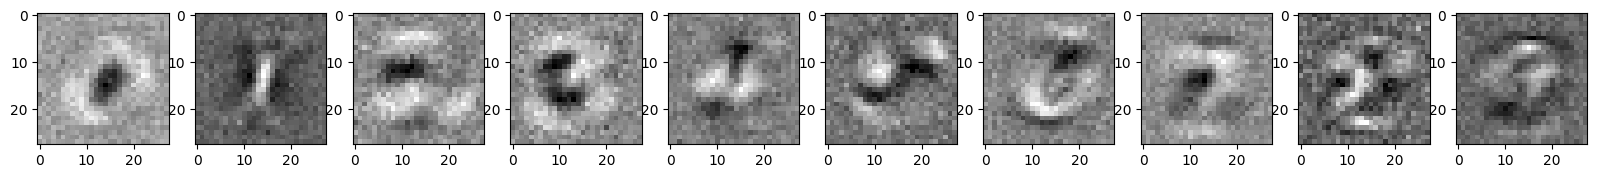

In [25]:
# Get weights
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
    ax[digit].imshow(W[:,digit].detach().view(28,28), cmap='gray')

In [27]:
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

W = torch.randn(784,10)/np.sqrt(784)
W.requires_grad_()
b = torch.zeros(10,requires_grad=True)

optimizer = torch.optim.SGD([W,b],lr=0.1)

for images,labels in tqdm(train_loader):
    optimizer.zero_grad()

    x = images.view(-1,28*28)
    y = torch.matmul(x,W)+b
    cross_entropy = F.cross_entropy(y,labels)
    cross_entropy.backward()
    optimizer.step()

correct = 0
total = len(mnist_test)

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        x = images.view(-1,28*28)
        y = torch.matmul(x,W)+b

        predictions = torch.argmax(y,dim=1)
        correct += torch.sum(predictions==labels).float()

print("Test accuracy: {}".format(correct/total))



  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9017999768257141


In [28]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

class MNIST_Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, x):
        return self.lin(x)

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

## Training
# Instantiate model
model = MNIST_Logistic_Regression()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Iterate through train set minibatchs
for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()

    # Forward pass
    x = images.view(-1, 28*28)
    y = model(x)
    loss = criterion(y, labels)
    # Backward pass
    loss.backward()
    optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9025999903678894
